In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing import image


In [26]:
import pathlib
import os
data_dir_train=r"E:\tree_data\train"
data_dir_train = pathlib.Path(data_dir_train)
data_dir_test=r"E:\tree_data\test"
data_dir_test = pathlib.Path(data_dir_test)
data_dir_val=r"E:\tree_data\validation"
data_dir_val = pathlib.Path(data_dir_val)
image_count_train= len(list(data_dir_train.glob('*/*')))
image_count_test= len(list(data_dir_test.glob('*/*')))
image_count_val= len(list(data_dir_val.glob('*/*')))
print("total image:",image_count_train+image_count_test+image_count_val)
print("train data 70%: ",image_count_train,"image")
print("test data 20%: ",image_count_test,"image")
print("validation data 10%: ",image_count_val,"image")


total image: 960
train data 70%:  672 image
test data 20%:  192 image
validation data 10%:  96 image


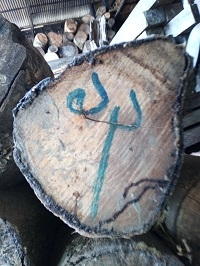

In [27]:
mango = list(data_dir_train.glob('Mango/*'))
PIL.Image.open(str(mango[0]))

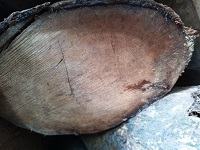

In [28]:
PIL.Image.open(str(mango[1]))

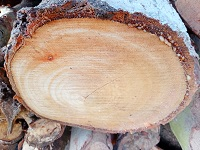

In [29]:
ashoke = list(data_dir_train.glob('Ashoke/*'))
PIL.Image.open(str(ashoke[0]))

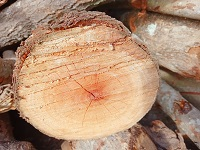

In [30]:
PIL.Image.open(str(ashoke[1]))

In [31]:
batch_size =9
img_height =300
img_width = 300

In [32]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 672 files belonging to 14 classes.


In [33]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 192 files belonging to 14 classes.


In [34]:
class_names = train_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


In [35]:
class_names = test_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


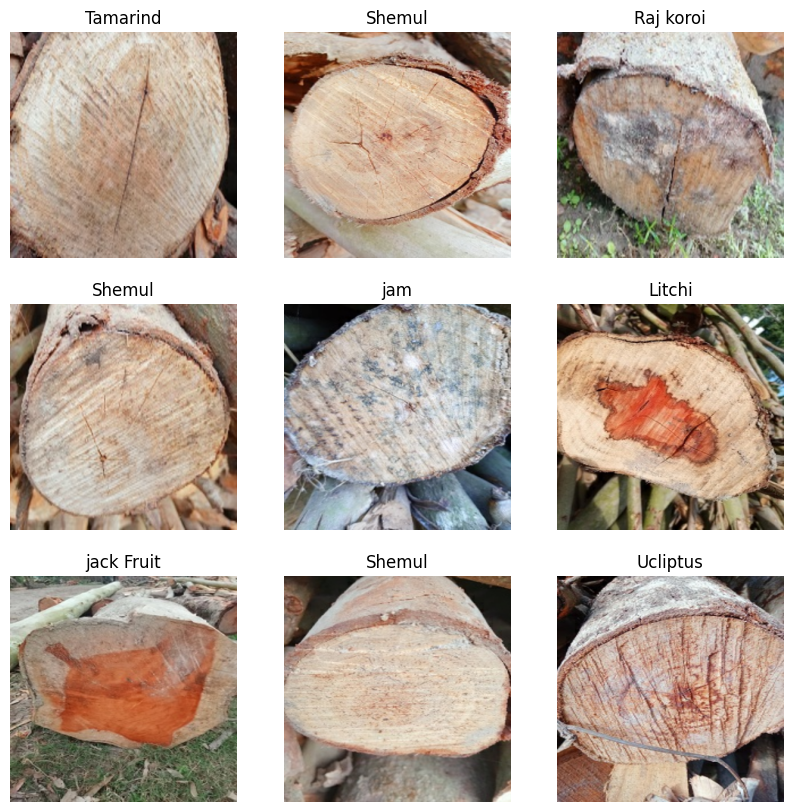

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [37]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(9, 300, 300, 3)
(9,)


In [38]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [39]:
normalization_layer = layers.Rescaling(1./255)

In [40]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [41]:
from keras.layers import Input,Flatten,Dense
from keras.models import Model
from tensorflow.keras.applications import EfficientNetB3
from keras.models import Sequential
from glob import glob

In [42]:
num_classes = len(class_names)


In [43]:
model =EfficientNetB3(weights='imagenet')
model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 300, 300, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 300, 300, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                     

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/50


C:\Users\Md. Minhazul Abedin\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 384s 5s/step - loss: 2.7044 - accuracy: 0.2545 - val_loss: 3.1198 - val_accuracy: 0.2396
Epoch 2/50
75/75 [==============================] - 412s 5s/step - loss: 1.2686 - accuracy: 0.5729 - val_loss: 2.7243 - val_accuracy: 0.4688
Epoch 3/50
75/75 [==============================] - 414s 6s/step - loss: 0.8593 - accuracy: 0.6994 - val_loss: 2.4777 - val_accuracy: 0.5417
Epoch 4/50
75/75 [==============================] - 417s 6s/step - loss: 0.8062 - accuracy: 0.7143 - val_loss: 1.5686 - val_accuracy: 0.5781
Epoch 5/50
75/75 [==============================] - 396s 5s/step - loss: 0.5918 - accuracy: 0.7991 - val_loss: 2.1955 - val_accuracy: 0.5208
Epoch 6/50
75/75 [==============================] - 393s 5s/step - loss: 0.4745 - accuracy: 0.8393 - val_loss: 2.4121 - val_accuracy: 0.6562
Epoch 7/50
75/75 [==============================] - 396s 5s/step - loss: 0.3762 - accuracy: 0.8482 - val_loss: 1.2455 - val_accuracy: 0.6562
Epoch 8/50
75/75 [======

In [46]:
train_accuracy=history.history['accuracy']
t_accuracy=0
for x in train_accuracy:
    t_accuracy=t_accuracy+x
t_accuracy=(t_accuracy/epochs)*100

val_accuracy=history.history['val_accuracy']
v_accuracy=0
for x in val_accuracy:
    v_accuracy=v_accuracy+x
v_accuracy=(v_accuracy/epochs)*100
print("Train Accuracy : ",train_accuracy)
print("Valiation Accuracy : ",val_accuracy)
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("Train Accuracy average : ",t_accuracy,"%")
print("Valiation Accuracy average : ",v_accuracy,"%")
print("Max Accuracy: ",max(val_accuracy)*100)

Train Accuracy :  [0.2544642984867096, 0.5729166865348816, 0.699404776096344, 0.7142857313156128, 0.7991071343421936, 0.8392857313156128, 0.8482142686843872, 0.8482142686843872, 0.8482142686843872, 0.8690476417541504, 0.894345223903656, 0.9017857313156128, 0.8660714030265808, 0.84375, 0.836309552192688, 0.8973214030265808, 0.918154776096344, 0.925595223903656, 0.9627976417541504, 0.9732142686843872, 0.9895833134651184, 0.992559552192688, 0.9866071343421936, 0.992559552192688, 0.992559552192688, 0.988095223903656, 0.9851190447807312, 0.9553571343421936, 0.886904776096344, 0.6845238208770752, 0.7901785969734192, 0.8913690447807312, 0.949404776096344, 0.9732142686843872, 0.9851190447807312, 0.9866071343421936, 0.9895833134651184, 0.9836309552192688, 0.9940476417541504, 0.9940476417541504, 0.9970238208770752, 0.9985119104385376, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9955357313156128, 0.9970238208770752]
Val

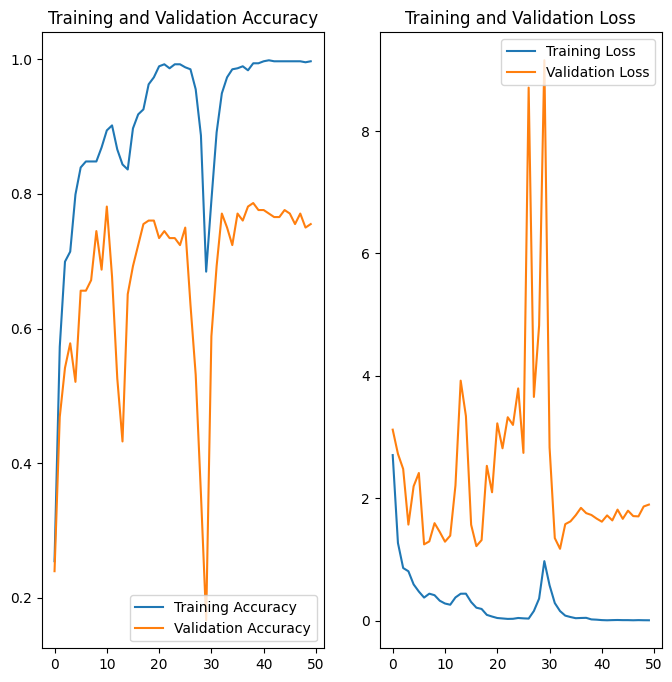

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

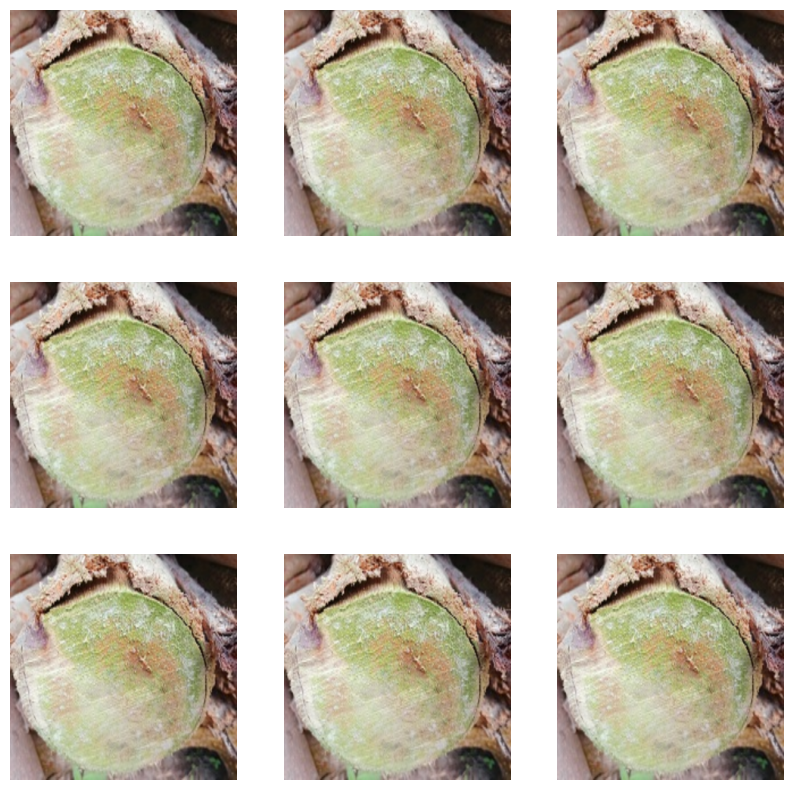

In [49]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/50
75/75 [==============================] - 394s 5s/step - loss: 0.1728 - accuracy: 0.9539 - val_loss: 12.4620 - val_accuracy: 0.6771
Epoch 2/50
75/75 [==============================] - 399s 5s/step - loss: 0.3644 - accuracy: 0.8810 - val_loss: 6.2948 - val_accuracy: 0.5573
Epoch 3/50
75/75 [==============================] - 391s 5s/step - loss: 0.2717 - accuracy: 0.9018 - val_loss: 3.7905 - val_accuracy: 0.6458
Epoch 4/50
75/75 [==============================] - 394s 5s/step - loss: 0.1815 - accuracy: 0.9449 - val_loss: 3.0644 - val_accuracy: 0.6823
Epoch 5/50
75/75 [==============================] - 419s 6s/step - loss: 0.1467 - accuracy: 0.9479 - val_loss: 2.2255 - val_accuracy: 0.7083
Epoch 6/50
75/75 [==============================] - 383s 5s/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 1.9067 - val_accuracy: 0.7240
Epoch 7/50
75/75 [==============================] - 360s 5s/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 2.0110 - val_accuracy: 0.7344
Epoch 8/50
7

In [52]:
train_accuracy=history.history['accuracy']
t_accuracy=0
for x in train_accuracy:
    t_accuracy=t_accuracy+x
t_accuracy=(t_accuracy/epochs)*100

val_accuracy=history.history['val_accuracy']
v_accuracy=0
for x in val_accuracy:
    v_accuracy=v_accuracy+x
v_accuracy=(v_accuracy/epochs)*100
print("Train Accuracy_aug : ",train_accuracy)
print("Valiation Accuracy_aug : ",val_accuracy)
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")

print("Train Accuracy average_aug : ",t_accuracy,"%")
print("Valiation Accuracy average_aug : ",v_accuracy,"%")
print("Max Accuracy: ",max(val_accuracy)*100)

Train Accuracy_aug :  [0.9538690447807312, 0.8809523582458496, 0.9017857313156128, 0.944940447807312, 0.9479166865348816, 0.9791666865348816, 0.9851190447807312, 0.9866071343421936, 0.9940476417541504, 0.9910714030265808, 0.9970238208770752, 0.9955357313156128, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9985119104385376, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9955357313156128, 0.9970238208770752, 0.9955357313156128, 0.9970238208770752, 0.9970238208770752, 0.9955357313156128, 0.9955357313156128, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9955357313156128, 0.668154776096344, 0.3199404776096344, 0.480654776096344, 0.6532738208770752, 0.7291666865348816, 

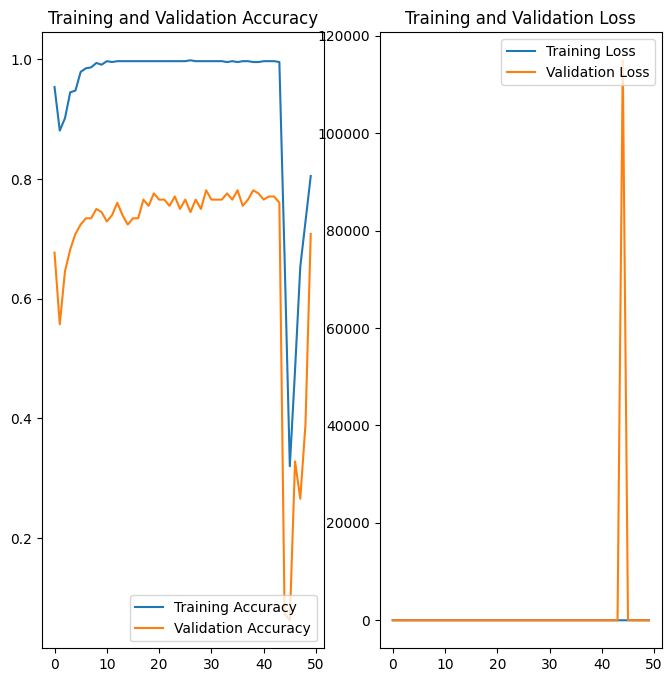

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
for y in list(data_dir_val.glob('*/*')):
    
    img = tf.keras.utils.load_img(
    y, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print (y)
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
      

1/1 [==============================] - 2s 2s/step
E:\tree_data\validation\Arjun\Arjun(1).jpg
This image most likely belongs to Arjun with a 0.22 percent confidence.
1/1 [==============================] - 0s 132ms/step
E:\tree_data\validation\Arjun\Arjun(2).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 143ms/step
E:\tree_data\validation\Arjun\Arjun(3).jpg
This image most likely belongs to Arjun with a 0.17 percent confidence.
1/1 [==============================] - 0s 152ms/step
E:\tree_data\validation\Arjun\Arjun(4).jpg
This image most likely belongs to Ashoke with a 0.17 percent confidence.
1/1 [==============================] - 0s 153ms/step
E:\tree_data\validation\Arjun\Arjun(5).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 156ms/step
E:\tree_data\validation\Arjun\Arjun(6).jpg
This image most likely belongs to Ashoke with a 0.21 percent confi